# Tracks Genre Classification

- What does each playlist set sound like? What are their defining characteristics?

- Using user-marked playlist genres as training data, can we build a model to correctly classify songs from a separate track dataset?

In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read and check values of 2 playlist sets

In [28]:
#set keyword
KEYWORD1='rock'

In [29]:
# read and process the playlist data for keyword
playlist1_df = pd.read_csv('data/'+KEYWORD1+'_playlist_data.csv')
playlist1_df.head(20)

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DWXRqgorJj26U,Rock Classics,145,spotify,Spotify,8442915
1,37i9dQZF1DXcF6B6QPhFDv,Rock This,50,spotify,Spotify,4497159
2,37i9dQZF1DX1rVvRgjX59F,90s Rock Anthems,152,spotify,Spotify,3947353
3,37i9dQZF1DWYN0zdqzbEwl,Rock en Español,60,spotify,Spotify,3794503
4,37i9dQZF1DX6xOPeSOGone,Soft Rock,100,spotify,Spotify,2659070
5,37i9dQZF1DX8FwnYE6PRvL,Rock Party,50,spotify,Spotify,1765840
6,37i9dQZF1DX1spT6G94GFC,80s Rock Anthems,80,spotify,Spotify,1573530
7,37i9dQZF1DX68H8ZujdnN7,’80s Hard Rock,104,spotify,Spotify,1474511
8,37i9dQZF1DX2sUQwD7tbmL,Feel-Good Indie Rock,200,spotify,Spotify,1344026
9,37i9dQZF1DWWRktbhJiuqL,Pure Rock & Roll,100,spotify,Spotify,1303428


In [30]:
playlist1_df.shape

(97, 6)

In [31]:
# read and process the playlist data for keyword
tracks1_df = pd.read_csv('data/'+KEYWORD1+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/'+KEYWORD1+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
#make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
#tag genre with keyword
tracks1_df['genre']=KEYWORD1
tracks1_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
0,0hCB0YR03f6AmQaHbwWDe8,Whole Lotta Love - 1990 Remaster,36QJpDe2go2KgaRleHCDTp,Led Zeppelin,70lQYZtypdCALtFVlQAcvx,333893,1969-10-22,77,0.412,0.902,...,0.405,0.0484,0.131,0.405,0.422,89.74,37i9dQZF1DWXRqgorJj26U,Rock Classics,5.564883,rock
1,0hCB0YR03f6AmQaHbwWDe8,Whole Lotta Love - 1990 Remaster,36QJpDe2go2KgaRleHCDTp,Led Zeppelin,70lQYZtypdCALtFVlQAcvx,333893,1969-10-22,77,0.412,0.902,...,0.405,0.0484,0.131,0.405,0.422,89.74,37i9dQZF1DX8FwnYE6PRvL,Rock Party,5.564883,rock
2,0hCB0YR03f6AmQaHbwWDe8,Whole Lotta Love - 1990 Remaster,36QJpDe2go2KgaRleHCDTp,Led Zeppelin,70lQYZtypdCALtFVlQAcvx,333893,1969-10-22,77,0.412,0.902,...,0.405,0.0484,0.131,0.405,0.422,89.74,37i9dQZF1DWWRktbhJiuqL,Pure Rock & Roll,5.564883,rock
3,0hCB0YR03f6AmQaHbwWDe8,Whole Lotta Love - 1990 Remaster,36QJpDe2go2KgaRleHCDTp,Led Zeppelin,70lQYZtypdCALtFVlQAcvx,333893,1969-10-22,77,0.412,0.902,...,0.405,0.0484,0.131,0.405,0.422,89.74,3Ho3iO0iJykgEQNbjB2sic,"Classic Rock 70s 80s 90s, Rock Classics - 70s ...",5.564883,rock
4,0hCB0YR03f6AmQaHbwWDe8,Whole Lotta Love - 1990 Remaster,36QJpDe2go2KgaRleHCDTp,Led Zeppelin,70lQYZtypdCALtFVlQAcvx,333893,1969-10-22,77,0.412,0.902,...,0.405,0.0484,0.131,0.405,0.422,89.74,3Ho3iO0iJykgEQNbjB2sic,"Classic Rock 70s 80s 90s, Rock Classics - 70s ...",5.564883,rock


In [32]:
tracks1_df.shape

(2445, 23)

In [33]:
# How many unique tracks are in playlist set 1?
len(tracks1_df['track_id'].unique())

2057

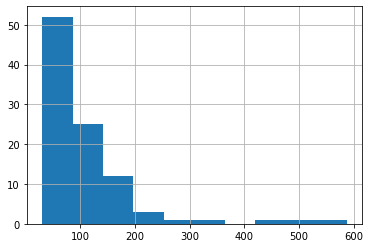

In [34]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['playlist_total_tracks'].hist()

In [35]:
len(playlist1_df[playlist1_df['playlist_total_tracks']>10])

97

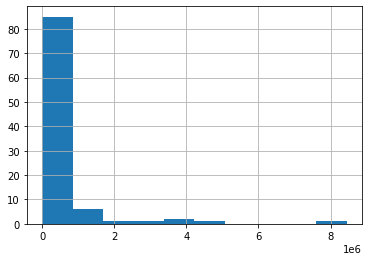

In [36]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['total_followers'].hist()

In [37]:
###################### set keyword
KEYWORD2='R&B'

In [38]:
# read and process the playlist data for keyword
playlist2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_data.csv')
playlist2_df.head(20)

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,40,spotify,Spotify,3185162
1,37i9dQZF1DX6VDO8a6cQME,I Love My '90s R&B,45,spotify,Spotify,2386512
2,37i9dQZF1DX2UgsUIg75Vg,Chilled R&B,50,spotify,Spotify,2030487
3,37i9dQZF1DWSfMe9z89s9B,Alternative R&B,100,spotify,Spotify,860553
4,37i9dQZF1DXbirtHQBuwCo,TrenChill K-R&B,50,spotify,Spotify,481097
5,37i9dQZF1DX1wNY9tfWQsS,Women of R&B,70,spotify,Spotify,346648
6,37i9dQZF1DX2WkIBRaChxW,R&B Right Now,62,spotify,Spotify,326803
7,36scvoM0cRA50MCZGhv3wo,R&B Party Classics,134,sonymusicentertainment,Filtr Sweden,315866
8,37i9dQZF1DXch2nNxu927l,Suprême R&B,50,spotify,Spotify,269003
9,37i9dQZF1DX7J2y2eWxEnR,R&B Connect,60,spotify,Spotify,163555


In [39]:
playlist2_df.shape

(61, 6)

In [40]:
# read and process the playlist data for keyword
tracks2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/'+KEYWORD2+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
#make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
#tag genre with keyword
tracks2_df['genre']=KEYWORD2
tracks2_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
0,6nTcn8CybBcx0t7IaXEJ6O,Thank God I Found You (feat. Joe & Nas) - Make...,4iHNK0tOyZPYnBU7nGAgpQ,Mariah Carey,6zuCJaxmHKNKN5hMDF556U,251640,2000-04-18,55,0.608,0.760,...,0.2420,0.0129,0.0,0.3320,0.366,168.211,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,4.194000,R&B
1,7FWuzwapuKHTEyDJIcQOw3,Stutter (feat. Mystikal) - Double Take Remix,3zTOe1BtyTkwNvYZOxXktX,Joe,6zuCJaxmHKNKN5hMDF556U,213026,2000-04-18,55,0.767,0.759,...,0.1170,0.0513,0.0,0.3100,0.677,89.989,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,3.550433,R&B
2,3QE7ObGjkt1kYnhLvZPRUy,Go On Girl,21E3waRsmPlU7jZsS13rcj,Ne-Yo,52q9xNv8COtSU9phlbO5sg,261426,2007-01-01,65,0.637,0.521,...,0.1090,0.1550,0.0,0.0945,0.562,83.896,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,4.357100,R&B
3,6De63WRULDaa1fxOyLilnv,Stingy,7r8RF1tN2A4CiGEplkp1oP,Ginuwine,3t4OgAvvOzvXw8D2NHUeDR,259493,2003-04-08,54,0.622,0.573,...,0.0547,0.2600,0.0,0.1730,0.617,127.132,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,4.324883,R&B
4,08fhbfRSg7eEH0IZT7pB6a,That Girl,1goOx6gnQdUllLfSMsL4Rt,Marques Houston,4sAouJxcSwPIoT5dd6Qgj7,215960,2003-10-21,53,0.683,0.552,...,0.1080,0.5480,0.0,0.2210,0.519,98.946,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,3.599333,R&B


In [41]:
tracks2_df.shape

(1467, 23)

In [42]:
# How many unique tracks are in playlist 2?
len(tracks2_df['track_id'].unique())

1293

## 2. Compare histograms of 2 playlist sets

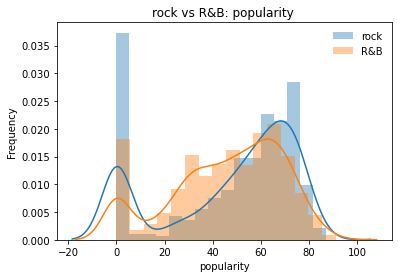

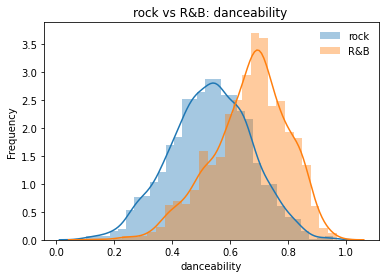

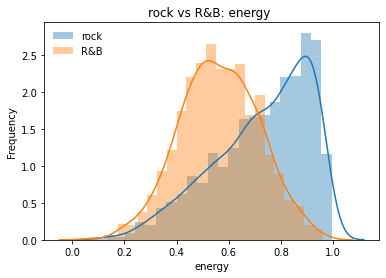

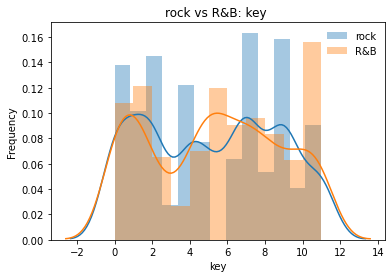

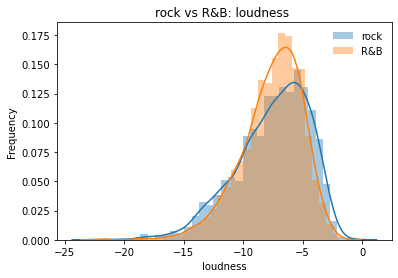

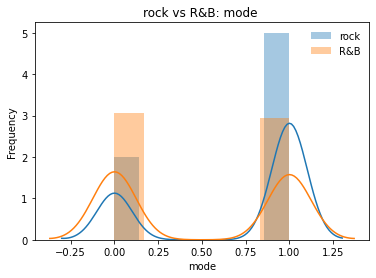

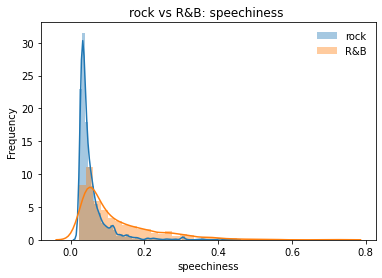

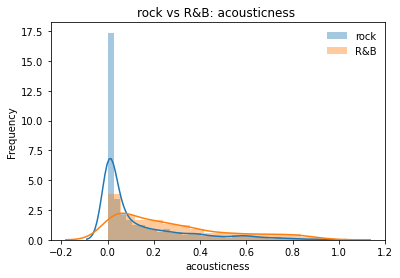

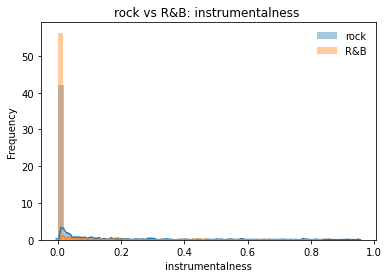

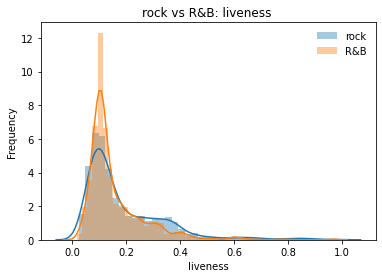

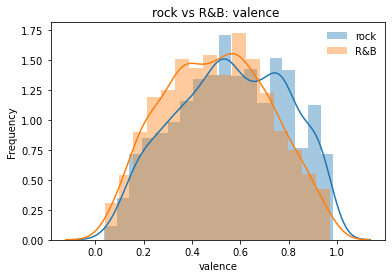

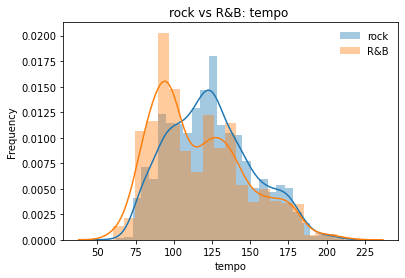

In [43]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    fig = plt.figure()
    ax= fig.add_subplot(111)
    
    sns.distplot(tracks1_df[col], ax=ax, label= KEYWORD1)
    sns.distplot(tracks2_df[col], ax=ax, label= KEYWORD2)
    plt.title("%s vs %s: %s " % (KEYWORD1,KEYWORD2,col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()


>Q: What feature/s best distinguish the 2 categories from each other? Does it make sense to use this as a feature for a classification model?

## 3. Feature Engineering

In [109]:
#get union of two playlist tracks list
tracks_df = pd.concat([tracks1_df,tracks2_df])
tracks1_df.shape, tracks2_df.shape, tracks_df.shape

((2445, 23), (1467, 23), (3912, 23))

In [112]:
#retain only distinct tracks per keyword
tracks_df =tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(3350, 23)

In [113]:
#Normalize loudness
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

tracks_df['loudness'] = scaler.fit_transform(tracks_df[['loudness']])
tracks_df['loudness'].describe()


count    3350.000000
mean        0.686869
std         0.134994
min         0.000000
25%         0.608084
50%         0.707297
75%         0.786079
max         1.000000
Name: loudness, dtype: float64

In [114]:
#Normalize tempo
tracks_df['tempo'] =  scaler.fit_transform(tracks_df[['tempo']])
#check
tracks_df['tempo'].describe()


count    3350.000000
mean        0.393988
std         0.187679
min         0.000000
25%         0.241706
50%         0.385717
75%         0.517090
max         1.000000
Name: tempo, dtype: float64

In [115]:
# map genres to numbers
tracks_df['genre_id'] = tracks_df['genre'].map({KEYWORD1:1,KEYWORD2:2})

## 4. Preview possible groupings

>Q: Pick the 2 best distinguishing features of the 2 playlist sets and plot each row as a scatterplot/distplot colored by genre


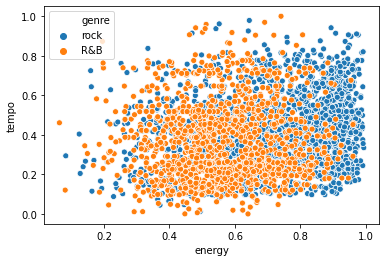

In [116]:
sns.scatterplot(data=tracks_df, x='energy', y='tempo', hue='genre')

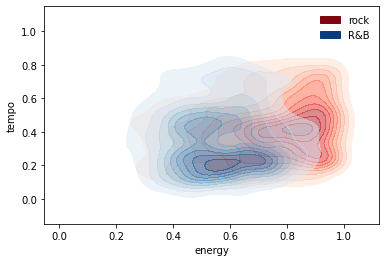

In [117]:
fig = plt.figure()
ax= fig.add_subplot(111)

colormaps = ['Reds','Blues']
for n,genre in enumerate([KEYWORD1,KEYWORD2]):
    df=tracks_df[tracks_df['genre']==genre]
    sns.kdeplot(df['energy'],df['tempo'], ax=ax,\
                shade=True, shade_lowest=False, alpha=0.5, cmap=colormaps[n],\
                label=genre)
    
plt.legend(frameon=False)


> Q: How would you interpret the resulting scatterplot/distribution?

## 5. Model Tuning: KNN

In [144]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report

Select audio features to use for the model

In [124]:
# create feature matrix (X)
feature_cols = ['energy','tempo']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))


Shape of X_Train:(2680, 2)
Shape of y_Train:(2680,)
Shape of X_Test:(670, 2)
Shape of y_Test:(670,)


Perform KNN using K= [1..50] and validate using k-fold k = 5

In [125]:
cv_scores = []

neighbors=np.arange(2,51)

for k in neighbors:
    print('Fitting for k=%d' % k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

Fitting for k=2
Fitting for k=3
Fitting for k=4
Fitting for k=5
Fitting for k=6
Fitting for k=7
Fitting for k=8
Fitting for k=9
Fitting for k=10
Fitting for k=11
Fitting for k=12
Fitting for k=13
Fitting for k=14
Fitting for k=15
Fitting for k=16
Fitting for k=17
Fitting for k=18
Fitting for k=19
Fitting for k=20
Fitting for k=21
Fitting for k=22
Fitting for k=23
Fitting for k=24
Fitting for k=25
Fitting for k=26
Fitting for k=27
Fitting for k=28
Fitting for k=29
Fitting for k=30
Fitting for k=31
Fitting for k=32
Fitting for k=33
Fitting for k=34
Fitting for k=35
Fitting for k=36
Fitting for k=37
Fitting for k=38
Fitting for k=39
Fitting for k=40
Fitting for k=41
Fitting for k=42
Fitting for k=43
Fitting for k=44
Fitting for k=45
Fitting for k=46
Fitting for k=47
Fitting for k=48
Fitting for k=49
Fitting for k=50


Choose optimal value of K

The optimal number of neighbors is 25


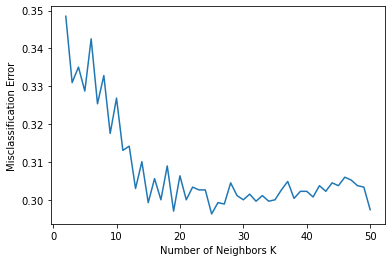

In [126]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

Compute accuracy of optimal K for the testing set

In [127]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, Y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 25 is 68.955224%


Create a classification report

In [145]:
print(classification_report(y,knn_optimal.predict(X)))

              precision    recall  f1-score   support

           1       0.79      0.75      0.77      2057
           2       0.63      0.67      0.65      1293

    accuracy                           0.72      3350
   macro avg       0.71      0.71      0.71      3350
weighted avg       0.73      0.72      0.72      3350



- accuracy = all correct /all
- precision =  TP/TP+FP
- recall = TP/TP+FN
- f1-score = weighted average of Precision and Recall
        F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- support = number of items in the class

- macro ave = average of the unweighted mean per label
- weighted ave = average of the weighted mean per label


Plot an ROC curve for each position type prediction using the optimal KNN model

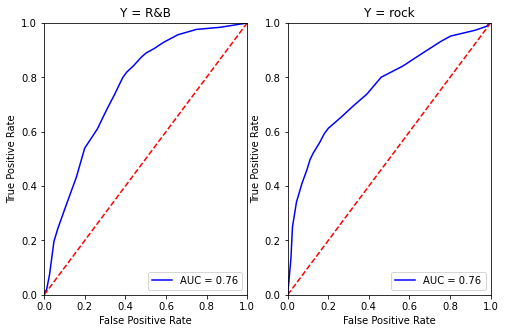

In [140]:
y_scores = knn_optimal.predict_proba(X_test)
genres = tracks_df['genre'].unique()

fig = plt.figure(figsize=[8,5])

for i in np.arange(len(genres)):
    genre_id = i+1
    y_test =[1 if k==genre_id else 0 for k in Y_test]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, i])
    roc_auc = auc(fpr, tpr)

    ax = fig.add_subplot('1'+str(len(genres))+str(i))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Y = '+str(genres[i]))


## 6. Model Tuning: SVM

In [141]:
from sklearn.svm import SVC

In [162]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    xmgn= (x.max()-x.min())*0.25
    ymgn = (y.max()-y.min())*0.25
    
    x_min, x_max = x.min() - xmgn, x.max() + xmgn
    y_min, y_max = y.min() - ymgn, y.max() + ymgn
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, xlims,ylims, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    
    return out

#visualize support vectors
def plot_vector_bounds(X,svm_model):
    fig,ax=plt.subplots()

    X0 = X.to_numpy()[:, 0]
    X1 = X.to_numpy()[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, svm_model, xx, yy, [0,1],[0,1],
                      cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [142]:
# create feature matrix (X)
feature_cols = ['energy','tempo']
X = tracks_df[feature_cols]
y = tracks_df['genre_id']

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))


Shape of X_Train:(2680, 2)
Shape of y_Train:(2680,)
Shape of X_Test:(670, 2)
Shape of y_Test:(670,)


>Q: Go back to the scatter/distplot. What seems to be the appropriate kernel type to use for the classification?

Fit model and use at least 2 kernels

In [163]:
svm_model1 = SVC(kernel='linear')
pred1 = svm_model1.fit(X, y) 

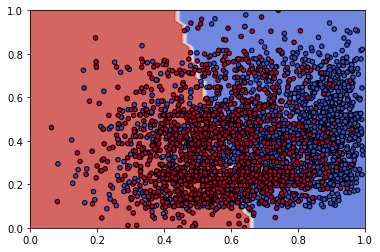

In [164]:
#plot bounds
plot_vector_bounds(X,svm_model1)

In [155]:
#show classification
print(classification_report(y,svm_model1.predict(X)))

              precision    recall  f1-score   support

           1       0.73      0.77      0.75      2057
           2       0.60      0.55      0.58      1293

    accuracy                           0.69      3350
   macro avg       0.67      0.66      0.66      3350
weighted avg       0.68      0.69      0.68      3350



In [156]:
#polynomial kernel
svm_model2 = SVC(kernel='poly', degree=3, gamma=0.9)
pred2 = svm_model2.fit(X, y) 

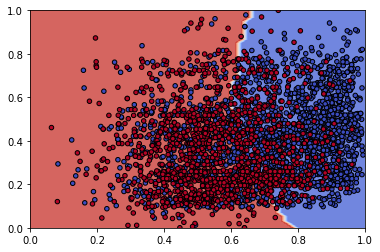

In [168]:
#plot bounds
plot_vector_bounds(X,svm_model2)

In [159]:
#show classification
print(classification_report(y,svm_model2.predict(X)))

              precision    recall  f1-score   support

           1       0.78      0.69      0.73      2057
           2       0.58      0.69      0.63      1293

    accuracy                           0.69      3350
   macro avg       0.68      0.69      0.68      3350
weighted avg       0.70      0.69      0.69      3350



In [169]:
#polynomial kernel
svm_model3 = SVC(kernel='rbf', gamma=0.8)
pred3 = svm_model3.fit(X, y) 

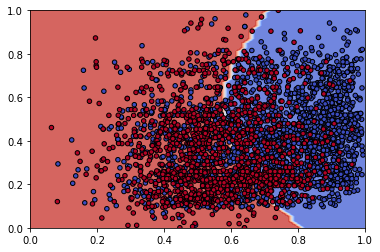

In [170]:
#plot bounds
plot_vector_bounds(X,svm_model3)

In [172]:
#show classification
print(classification_report(y,svm_model3.predict(X)))

              precision    recall  f1-score   support

           1       0.76      0.72      0.74      2057
           2       0.59      0.65      0.62      1293

    accuracy                           0.69      3350
   macro avg       0.68      0.68      0.68      3350
weighted avg       0.70      0.69      0.69      3350



## 7. Model Selection

Which between KNN and SVM performed better? 
Create a column matching the predicted genre and probability of the better model to each of the tracks

In [128]:
tracks_df['predicted_genre_id'] = tracks_df.apply(lambda x:  knn_optimal.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
tracks_df['predicted_genre_prob'] = tracks_df.apply(lambda x:  np.max(knn_optimal.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
tracks_df

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre,genre_id,predicted_genre_id,predicted_genre_prob
0,0hCB0YR03f6AmQaHbwWDe8,Whole Lotta Love - 1990 Remaster,36QJpDe2go2KgaRleHCDTp,Led Zeppelin,70lQYZtypdCALtFVlQAcvx,333893,1969-10-22,77,0.412,0.902,...,0.4050,0.422,0.192516,37i9dQZF1DWXRqgorJj26U,Rock Classics,5.564883,rock,1,1,0.92
5,2aoo2jlRnM3A0NyLQqMN2f,All Along the Watchtower,776Uo845nYHJpNaStv1Ds4,Jimi Hendrix,5z090LQztiqh13wYspQvKQ,240800,1968-10-25,78,0.438,0.805,...,0.0842,0.564,0.344666,37i9dQZF1DWXRqgorJj26U,Rock Classics,4.013333,rock,1,1,0.76
8,08mG3Y1vljYA6bvDt4Wqkj,Back In Black,711MCceyCBcFnzjGY4Q7Un,AC/DC,6mUdeDZCsExyJLMdAfDuwh,255493,1980-07-25,84,0.310,0.700,...,0.0828,0.763,0.830844,37i9dQZF1DWXRqgorJj26U,Rock Classics,4.258217,rock,1,1,0.68
12,1RJeiAIwR9pZBgJA8ndZLL,"Paint It, Black - Mono",22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,5nKpMsduwp5xqCKq2IbSKv,204480,1966-01-01,69,0.505,0.836,...,0.2950,0.764,0.645019,37i9dQZF1DWXRqgorJj26U,Rock Classics,3.408000,rock,1,1,0.96
13,66lOpKgTyFjOrac4S1s94g,Rebel Rebel - 1999 Remaster,0oSGxfWSnnOXhD2fKuz2Gy,David Bowie,6JxxRxzjsOTtKVie29FTt2,269360,1974-04-24,0,0.676,0.920,...,0.2480,0.624,0.429357,37i9dQZF1DWXRqgorJj26U,Rock Classics,4.489333,rock,1,1,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,6a51sCiFIP84K75HXhMei3,Chloe,7ItuVBUh0amgt1MCDkshWx,NUMB,0F2toa93tEbYKI7z5TnUw7,163732,2020-08-21,33,0.642,0.752,...,0.0823,0.608,0.194198,37i9dQZF1DX4CB6zI8FWXS,Groovin' R&B,2.728867,R&B,2,2,0.60
1463,1h49nxOoviRjy9Dyz53Gr7,London,0f2YkMXwFNJNSX7MymevKE,Kaash Paige,0nfhJM8ywsCnOmoJNblItu,167840,2020-08-14,56,0.654,0.521,...,0.0684,0.223,0.148798,37i9dQZF1DX4CB6zI8FWXS,Groovin' R&B,2.797333,R&B,2,2,0.68
1464,18eZc40EneLmStYEy3cLBP,Kamikaze,5FxD8fkQZ6KcsSYupDVoSO,Omar Apollo,6LXh08HxqIquqWttoIHInn,210914,2020-09-10,63,0.705,0.734,...,0.0930,0.457,0.226527,37i9dQZF1DX4CB6zI8FWXS,Groovin' R&B,3.515233,R&B,2,2,0.60
1465,5SMKa6EVTFltVoZlNcKMYM,Simple Things [Feat. Tory Lanez & Rema],0orEyXhG0KnPEDVgpctNJI,DJDS,42epDPc7PKuwg4Z0ddv6KE,214406,2020-07-09,52,0.641,0.623,...,0.2050,0.398,0.287327,37i9dQZF1DX4CB6zI8FWXS,Groovin' R&B,3.573433,R&B,2,2,0.64


Check tracks mistakenly classified with but high probability 

In [130]:
tracks_df[(tracks_df['predicted_genre_id']!=tracks_df['genre_id'])&(tracks_df['predicted_genre_prob']>0.9)]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre,genre_id,predicted_genre_id,predicted_genre_prob
11,7f1Dmr246cJ9uQYdbplTbh,He Wasn't Man Enough,3X458ddYA2YcVWuVIGGOYe,Toni Braxton,0UZsKcXzOehMvFWTiBlwMi,261933,2000,67,0.739,0.947,...,0.3260,0.763,0.181315,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,4.365550,R&B,2,1,0.96
38,3VEZvzr84WVnoorZ4tlBSw,He Can't Love U,7Aq8lpLMSt1Zxu56pe9bmp,Jagged Edge,4tIkdOt2ohTHJ1VptEwNu3,244053,2000-01-18,58,0.721,0.836,...,0.2350,0.508,0.428956,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,4.067550,R&B,2,1,0.92
65,40xz60ciGIpsRtDqRfPKBE,Rub You The Right Way,7oHzn7edwmrYClrPRINkbn,Johnny Gill,3VNcHyjMgpq2UQN5LTs4qC,332306,1990-01-01,50,0.660,0.873,...,0.3310,0.864,0.335730,37i9dQZF1DX6VDO8a6cQME,I Love My '90s R&B,5.538433,R&B,2,1,0.92
171,3sPxWL4msAoJXdyUQGrblt,God Is A Genius,5ae3MM8dgOn3QPHzqFDJlY,Kevin Ross,7BFxdEOrbFdMGGXjCI7iVO,203313,2020-05-29,53,0.550,0.875,...,0.1840,0.539,0.177620,37i9dQZF1DX2UgsUIg75Vg,Chilled R&B,3.388550,R&B,2,1,0.92
280,7LBuBVWzbvpirsmmnpw9qc,One Day,6E9Q3EKPiOPUbBBFU1YXzi,Chris Anderson,2OtUwcHivk5SAq5W8hNrcC,322870,2020-06-23,34,0.374,0.888,...,0.1090,0.457,0.180079,37i9dQZF1DWSfMe9z89s9B,Alternative R&B,5.381167,R&B,2,1,0.92
316,086tVFodHOXOSN4xM0KDTE,Bad (feat. WOODZ),0gRsw676mIkWWAT1zdAHXb,Kriz,1NUclkDY8OCyYtTvRN9avI,194373,2018-09-21,32,0.709,0.881,...,0.1100,0.648,0.420033,37i9dQZF1DXbirtHQBuwCo,TrenChill K-R&B,3.239550,R&B,2,1,0.96
394,5lAH3vLN4Gc3jDM25cMIgH,Square Biz,61UT1Zj9dFgPAjZfwnsqsb,Teena Marie,7rBP3Z4FX95gFPTXgs4MMo,385573,2001-01-01,1,0.767,0.925,...,0.4090,0.732,0.347358,37i9dQZF1DX1wNY9tfWQsS,Women of R&B,6.426217,R&B,2,1,1.00
453,7beY8mXJuC4l0J2WgVoCfm,Bad Habits,23zg3TcAtWQy7J6upgbUnj,Usher,2sD4s8plx7sdr7Qn580kK6,257249,2020-09-10,71,0.620,0.829,...,0.1110,0.636,0.597199,37i9dQZF1DX2WkIBRaChxW,R&B Right Now,4.287483,R&B,2,1,0.96
495,0CmQgwV3Bmzh9nZb9TNVEI,Do To Me,3Y7RZ31TRPVadSFVy1o8os,H.E.R.,6b9SrV7fOCmUubzvBQvRVg,225103,2020-07-08,69,0.477,0.854,...,0.1680,0.494,0.549069,37i9dQZF1DX2WkIBRaChxW,R&B Right Now,3.751717,R&B,2,1,0.96
548,1uXbwHHfgsXcUKfSZw5ZJ0,Run the World (Girls),6vWDO969PvNqNYHIOW5v0m,Beyoncé,1gIC63gC3B7o7FfpPACZQJ,236093,2011-06-24,73,0.733,0.899,...,0.3720,0.760,0.434178,36scvoM0cRA50MCZGhv3wo,R&B Party Classics,3.934883,R&B,2,1,0.96


> Q: Focus on any of the songs you know that made it in the misclassified list (you may listen to some of them) 
    Does it make sense that the model misclassfied this song? Why or why not?

>Q: Would this model correctly classify tracks from the Spotify charting tracks dataset?

In [174]:
chart_tracks_df = pd.read_csv("data/spotify_daily_charts_tracks.csv")
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0ofbQMrRDsUaVKq2mGLEAb,Havana,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,216896,2017-08-03,5,0.768,0.517,7,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992
1,0tgVpDi06FyKpA1z0VMD4v,Perfect,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,263400,2017-03-03,86,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050
2,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),04gDigrS5kc9YWfZHwBETP,Maroon 5,1Jmq5HEJeA9kNi2SgQul4U,199849,2017-11-03,5,0.795,0.615,5,-5.211,0,0.0671,0.07860,0.000003,0.0855,0.393,110.009
3,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,2wY79sveU1sp5g7SokKOiI,Sam Smith,3TJz2UBNYJtlEly0sPeNrQ,201000,2017-11-03,81,0.681,0.372,5,-8.237,1,0.0432,0.64000,0.000000,0.1690,0.476,91.873
4,2ekn2ttSfGqwhhate0LSR0,New Rules,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,01sfgrNbnnPUEyz6GZYlt9,209320,2017-06-02,81,0.762,0.700,9,-6.021,0,0.0694,0.00261,0.000016,0.1530,0.608,116.073


In [175]:
chart_tracks_df['predicted_genre_id'] = chart_tracks_df.apply(lambda x:  knn_optimal.predict(x[feature_cols].values.reshape(1,-1))[0]\
                                               , axis=1)
chart_tracks_df['predicted_genre_prob'] = chart_tracks_df.apply(lambda x:  np.max(knn_optimal.predict_proba(x[feature_cols].values.reshape(1,-1)))\
                                                    , axis=1)
chart_tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre_prob
0,0ofbQMrRDsUaVKq2mGLEAb,Havana,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,216896,2017-08-03,5,0.768,0.517,...,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992,1,0.56
1,0tgVpDi06FyKpA1z0VMD4v,Perfect,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,3T4tUhGYeRNVUGevb0wThu,263400,2017-03-03,86,0.599,0.448,...,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,1,0.56
2,3hBBKuWJfxlIlnd9QFoC8k,What Lovers Do (feat. SZA),04gDigrS5kc9YWfZHwBETP,Maroon 5,1Jmq5HEJeA9kNi2SgQul4U,199849,2017-11-03,5,0.795,0.615,...,-5.211,0,0.0671,0.07860,0.000003,0.0855,0.393,110.009,1,0.56
3,1mXVgsBdtIVeCLJnSnmtdV,Too Good At Goodbyes,2wY79sveU1sp5g7SokKOiI,Sam Smith,3TJz2UBNYJtlEly0sPeNrQ,201000,2017-11-03,81,0.681,0.372,...,-8.237,1,0.0432,0.64000,0.000000,0.1690,0.476,91.873,1,0.56
4,2ekn2ttSfGqwhhate0LSR0,New Rules,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,01sfgrNbnnPUEyz6GZYlt9,209320,2017-06-02,81,0.762,0.700,...,-6.021,0,0.0694,0.00261,0.000016,0.1530,0.608,116.073,1,0.60


In [180]:
#Check tracks classified with higher probability
chart_tracks_df.sort_values(['predicted_genre_prob'])[:10]

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,predicted_genre_id,predicted_genre_prob
0,0ofbQMrRDsUaVKq2mGLEAb,Havana,4nDoRrQiYLoBzwC5BhVJzF,Camila Cabello,5chBPOVY2I0bG5V3igb5QL,216896,2017-08-03,5,0.768,0.517,...,-4.323,0,0.0312,0.18600,0.000038,0.1040,0.418,104.992,1,0.56
1286,43zdsphuZLzwA9k4DJhU0I,when the party's over,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,0S0KGZnfBGSIssfF54WSJh,196077,2019-03-29,86,0.367,0.111,...,-14.084,1,0.0972,0.97800,0.000040,0.0897,0.198,82.642,1,0.56
1285,4SSnFejRGlZikf02HLewEF,bury a friend,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,0S0KGZnfBGSIssfF54WSJh,193143,2019-03-29,81,0.905,0.389,...,-14.505,1,0.3320,0.74000,0.162000,0.1060,0.196,120.046,1,0.56
1284,3Fj47GNK2kUF0uaEDgXLaD,wish you were gay,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,0S0KGZnfBGSIssfF54WSJh,221543,2019-03-29,80,0.853,0.351,...,-10.198,1,0.2410,0.39000,0.000009,0.7520,0.282,118.028,1,0.56
1283,2Fxmhks0bxGSBdJ92vM42m,bad guy,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,0S0KGZnfBGSIssfF54WSJh,194087,2019-03-29,89,0.701,0.425,...,-10.965,1,0.3750,0.32800,0.130000,0.1000,0.562,135.128,1,0.56
1282,4u7EnebtmKWzUH433cf5Qv,Bohemian Rhapsody - 2011 Mix,1dfeR4HaWDbWqFHLkxsg1d,Queen,1GbtB4zTqAsyfZEsm1RZfx,354320,1975-11-21,83,0.414,0.404,...,-9.928,0,0.0499,0.27100,0.000000,0.3000,0.224,71.105,1,0.56
1280,3u9tIlAnygQGNJ5VuSvTfi,Bagay Tayo,0WleeEe3UurwlNbDGhb5Yz,ALLMO$T,7EyFdHaGHh73lOZz1zuFTe,397033,2018-12-04,0,0.804,0.557,...,-8.658,1,0.1630,0.32200,0.000000,0.1060,0.645,100.053,1,0.56
1278,2rXVtoLBHuXcNB5DVfIc9p,Happiness,7pbDxGE6nQSZVfiFdq9lOL,Rex Orange County,2NBVxjZcbH5H1N1Ab2ExDH,279693,2017-04-26,71,0.399,0.235,...,-9.774,1,0.0334,0.73400,0.000002,0.1610,0.197,105.645,1,0.56
1275,59aZ0ioyVrmtdut1KfU5aT,Amatz,6ogIjp0fsbUxlqy9q2rvrT,Shanti Dope,6uydeIIBbr8sN6XdI3rpuy,234374,2019-03-22,52,0.825,0.496,...,-8.562,1,0.0503,0.00817,0.000511,0.0827,0.185,127.987,1,0.56
1274,2H4gf1wLxvYreMj1jcaN0k,Be Alright,3QSQFmccmX81fWCUSPTS7y,Dean Lewis,1mRtVjwGgBvLiaJhPGHZ8M,196493,2019-03-22,0,0.551,0.537,...,-7.595,1,0.0340,0.70500,0.000000,0.0802,0.493,126.421,1,0.56


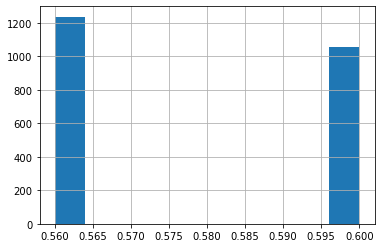

In [181]:
#View histogram of probabilities
chart_tracks_df['predicted_genre_prob'].hist()

## Day Deliverable
1. *Genre Classification (Individual)*

    A. Choose up to 6 music genres and obtain track data from the genre's top 20 most-followed playlists in Spotify. A group may distribute the data gathering task by assigning a genre to each person and then pooling all the gathered data in one shared folder.
    
   B. Pick any 2 music genres as your groupings for the classification exercise and repeat Steps 1-7. Make sure to answer the guide questions for each step
   
   C. Increase the number of features included in the models and repeat Steps 1-7 (but skip the plotting code cells). How does this affect the model scores?
   
   D. Modify the notebook to take in any 3 music genres as groupings and repeat Steps 1-7.
   

2. *(Optional, but useful to do ahead for your sprint project)*

    There are almost [innumerable](https://www.musicgenreslist.com/) named music genres online, but a summarized list  may be found [here](https://www.blisshq.com/music-library-management-blog/2011/01/25/fundamental-music-genre-list/). Can you build a model that can predict **at least 5 genres** listed in the latter with **>70% classification accuracy**?
    
    
3. *(Truly optional)*

    Can you build a **decision-tree**-based genre classification model with a >70% classification accuracy?

